Let's get started by importing the libraries we need

In [1]:
#Standard libraries
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import matplotlib.pyplot       as     plt
from   mpl_toolkits.mplot3d    import Axes3D
from   sklearn.linear_model    import LinearRegression
from   sklearn.neural_network  import MLPRegressor
from   sklearn.metrics         import mean_squared_error
from   sklearn.model_selection import cross_val_score,TimeSeriesSplit

In [2]:
#Read in the data
data = pd.read_csv('GBPUSD_Daily_20160103_20240131.csv',sep='\t')

The columns need to be renamed

In [3]:
#Clean up the data
data.rename(columns={'<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low','<CLOSE>':'Close'},inplace=True)

In [4]:
#Drop columns we don't need
data = data.drop(['<DATE>','<VOL>','<SPREAD>','<TICKVOL>'],axis=1)
data

Open     High      Low    Close
0     1.47306  1.47445  1.47260  1.47352
1     1.47350  1.48152  1.46626  1.47111
2     1.47112  1.47250  1.46374  1.46731
3     1.46730  1.46795  1.46016  1.46275
4     1.46274  1.46398  1.45327  1.46214
...       ...      ...      ...      ...
2503  1.27060  1.27583  1.26756  1.27029
2504  1.26950  1.27015  1.26904  1.26966
2505  1.26966  1.27189  1.26620  1.27118
2506  1.27118  1.27212  1.26403  1.26943
2507  1.26943  1.27507  1.26580  1.26792

[2508 rows x 4 columns]

Visualizing The Data

Text(0.5, 1.0, 'GBPUSD Daily Close')

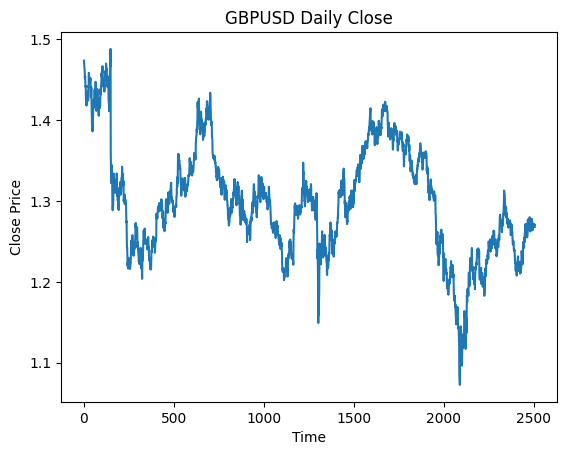

In [ ]:
#Plot the close price
plt.plot(data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("GBPUSD Daily Close")

Let's find good starting points for our model

In [5]:
#Define the input range
x_min , x_max = 2,100 #Look ahead
y_min , y_max = 2,100 #Period

In [6]:
#Sample input range uniformly
x_axis = np.arange(x_min,x_max,4) #Look ahead
y_axis = np.arange(y_min,y_max,4) #Period

In [7]:
#Create a meshgrid
x , y = np.meshgrid(x_axis,y_axis)

In [8]:
#This function will create and return a clean dataframe according to our specifications
def clean_data(look_ahead,period):
    #Create a copy of the data
    temp = pd.read_csv('GBPUSD_Daily_20160103_20240131.csv',sep='\t')
    #Clean up the data
    temp.rename(columns={'<OPEN>':'Open','<HIGH>':'High','<LOW>':'Low','<CLOSE>':'Close'},inplace=True)
    temp = temp.drop(['<DATE>','<VOL>','<SPREAD>','<TICKVOL>'],axis=1)
    #Define our target
    temp["Target"] = temp["Close"].shift(-look_ahead)
    #Apply the differencing
    temp["Close"] = temp["Close"].diff(period)
    temp["Open"] = temp["Open"].diff(period)
    temp["High"] = temp["High"].diff(period)
    temp["Low"] = temp["Low"].diff(period)
    temp = temp.dropna()
    temp = temp.reset_index(drop=True)
    return(temp)

In [9]:
#Evaluate the objective function
def evaluate(look_ahead,period):
    #Define the model
    model = MLPRegressor(max_iter=2**30,hidden_layer_sizes=(1,4)
    #Define our time series split
    tscv = TimeSeriesSplit(n_splits=5,gap=look_ahead)
    temp = clean_data(look_ahead,period)
    score = np.mean(cross_val_score(model,temp.loc[:,["Open","High","Low","Close"]],temp["Target"],cv=tscv))
    return(score)

In [10]:
#Define the objective
def objective(x,y):
    #Define the output matrix
    results = np.zeros([x.shape[0],y.shape[0]])
    #Fill in the output matrix
    for i in np.arange(0,x.shape[0]):
        #Select the rows
        look_ahead = x[i]
        period     = y[i]
        for j in np.arange(0,y.shape[0]):
            results[i,j] = evaluate(look_ahead[j],period[j])
    return(results)

In [ ]:
linear_reg_res = objective(x,y)

In [ ]:
linear_reg_res = np.abs(linear_reg_res)

Text(0.5, 1.0, 'Linear Regression Accuracy Forecasting GBPUSD Daily Close')

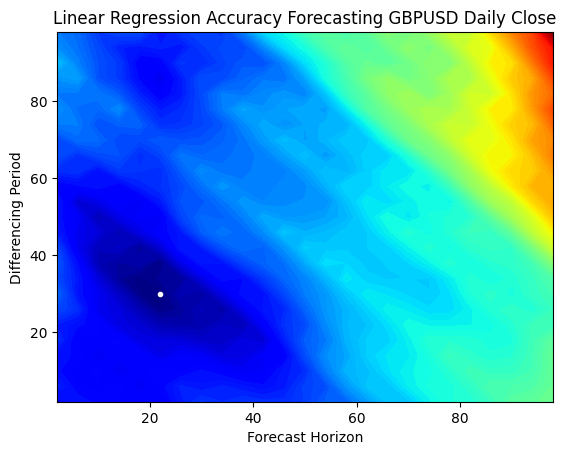

In [ ]:
plt.contourf(x,y,linear_reg_res,100,cmap="jet")
plt.plot(x_axis[linear_reg_res.min(axis=0).argmin()],y_axis[linear_reg_res.min(axis=1).argmin()],'.',color='white')
plt.ylabel("Differencing Period")
plt.xlabel("Forecast Horizon")
plt.title("Linear Regression Accuracy Forecasting GBPUSD Daily Close")

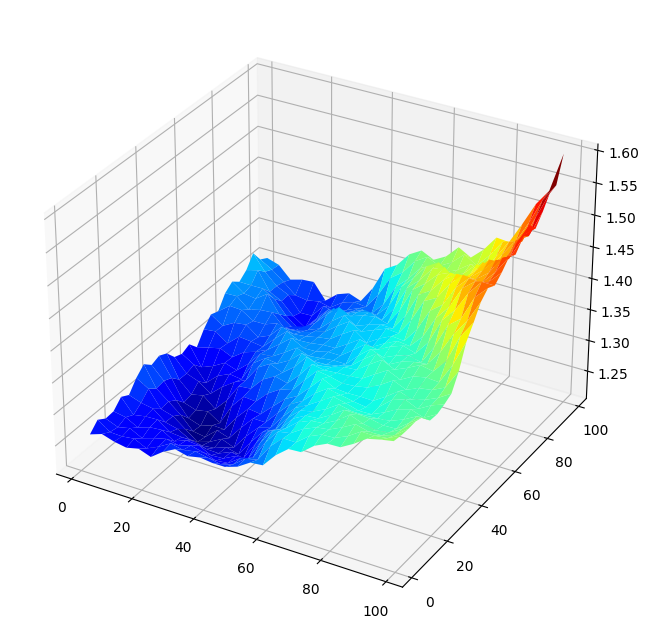

In [ ]:
#Create a surface plot
fig , ax = plt.subplots(subplot_kw={"projection":"3d"})
fig.set_size_inches(8,8)
ax.plot_surface(x,y,linear_reg_res,cmap="jet")

In [ ]:
res = objective(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

In [ ]:
res = np.abs(res)

Text(0.5, 1.0, 'Neural Network Accuracy Forecasting GBPUSD Daily Close')

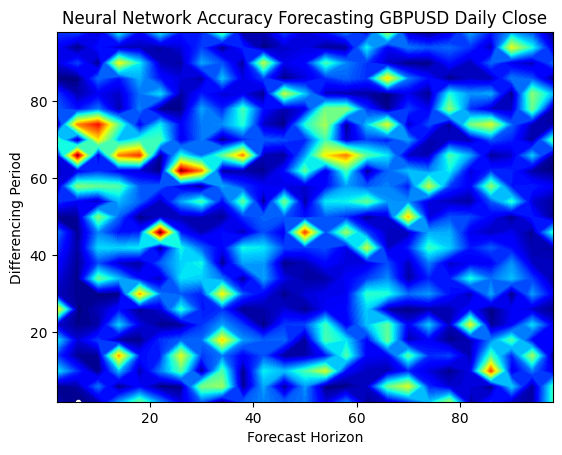

In [ ]:
plt.contourf(x,y,res,100,cmap="jet")
plt.plot(x_axis[res.min(axis=0).argmin()],y_axis[res.min(axis=1).argmin()],'.',color='white')
plt.ylabel("Differencing Period")
plt.xlabel("Forecast Horizon")
plt.title("Neural Network Accuracy Forecasting GBPUSD Daily Close")

In [ ]:
x_axis[res.min(axis=0).argmin()],y_axis[res.min(axis=1).argmin()]

(6, 2)

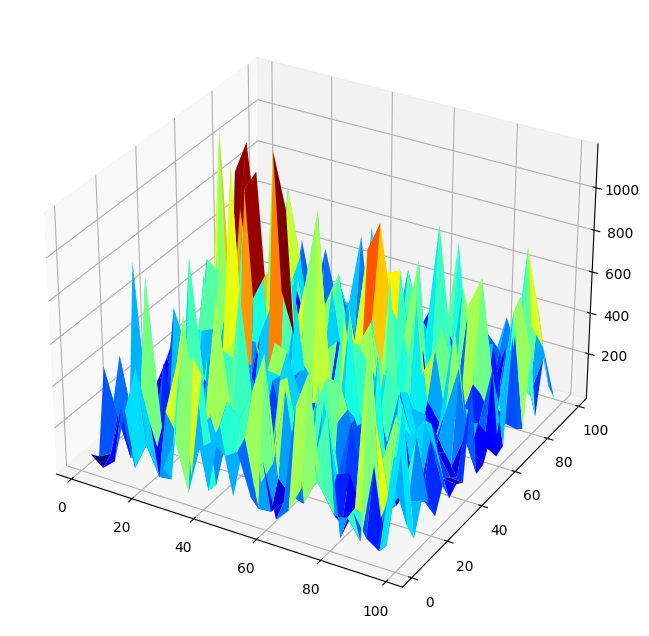

In [ ]:
#Create a surface plot
fig , ax = plt.subplots(subplot_kw={"projection":"3d"})
fig.set_size_inches(8,8)
ax.plot_surface(x,y,res,cmap="jet")

Let us now observe the double descent on the ideal solutions we have found

In [ ]:
#The best settings we have found so far
look_ahead = x_axis[res.min(axis=0).argmin()]
difference_period = y_axis[res.min(axis=1).argmin()]
data["Target"] = data["Close"].shift(-look_ahead)
#Apply the differencing
data["Close"] = data["Close"].diff(difference_period)
data["Open"] = data["Open"].diff(difference_period)
data["High"] = data["High"].diff(difference_period)
data["Low"] = data["Low"].diff(difference_period)
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)
data

Open     High      Low    Close   Target
0    -0.00194 -0.00195 -0.00886 -0.00621  1.44350
1    -0.00620 -0.01357 -0.00610 -0.00836  1.44092
2    -0.00838 -0.00852 -0.01047 -0.00517  1.44226
3    -0.00516 -0.00351 -0.00960 -0.01119  1.42543
4    -0.01130 -0.00829 -0.00418 -0.00973  1.42719
...       ...      ...      ...      ...      ...
2495  0.00735  0.00185  0.00647  0.00250  1.27029
2496  0.00006 -0.00035  0.00293 -0.00118  1.26966
2497 -0.00118  0.00179  0.00255  0.00042  1.27118
2498  0.00285  0.00387 -0.00282 -0.00082  1.26943
2499 -0.00082  0.00421 -0.00010  0.00117  1.26792

[2500 rows x 5 columns]

In [ ]:
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.neural_network  import MLPRegressor
from sklearn.metrics         import mean_squared_error

In [ ]:
max_epoch = 50

In [ ]:
err_rates = pd.DataFrame(columns = np.arange(0,max_epoch),index=["Train","Validation","Test"])

In [ ]:
err_rates

0    1    2    3    4    5    6    7    8    9   ...   40   41  \
Train       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
Validation  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
Test        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

             42   43   44   45   46   47   48   49  
Train       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Validation  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Test        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 50 columns]

In [ ]:
tscv = TimeSeriesSplit(n_splits=5,gap=look_ahead)

In [ ]:
train , test = train_test_split(data,shuffle=False,test_size=0.5)

In [ ]:
for j in np.arange(0,max_epoch):
  #Define our model and measure its error
  current_train_err = []
  current_val_err = []
  model = MLPRegressor(hidden_layer_sizes=(6,5),max_iter=(2 ** j))

  for i,(train_index,test_index) in enumerate(tscv.split(train)):
    #Assess the model
    model.fit(train.loc[train_index,["Open","High","Low","Close"]],train.loc[train_index,'Target'])
    current_train_err.append(mean_squared_error(train.loc[train_index,'Target'],model.predict(train.loc[train_index,["Open","High","Low","Close"]])))
    current_val_err.append(mean_squared_error(train.loc[test_index,'Target'],model.predict(train.loc[test_index,["Open","High","Low","Close"]])))

  #Record our observations
  err_rates.loc["Train",j]      = np.mean(current_train_err)
  err_rates.loc["Validation",j] = np.mean(current_val_err)
  err_rates.loc["Test",j]       = mean_squared_error(test['Target'],model.predict(test.loc[:,["Open","High","Low","Close"]]))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690

Text(0.5, 1.0, 'Neural Network Accuracy Forecasting GBPUSD Daily Close')

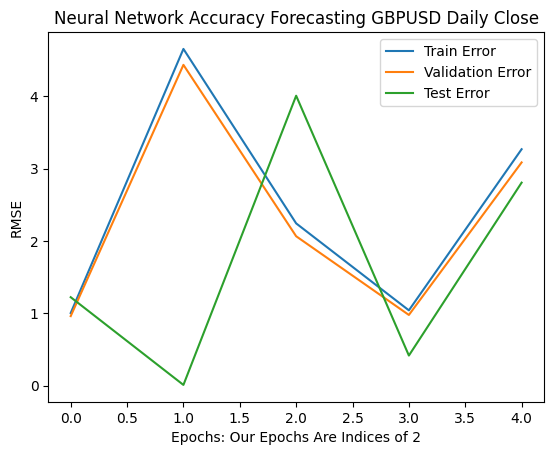

In [ ]:
plt.plot(err_rates.iloc[0,0:5])
plt.plot(err_rates.iloc[1,0:5])
plt.plot(err_rates.iloc[2,0:5])
plt.legend(["Train Error","Validation Error","Test Error"])
plt.ylabel("RMSE")
plt.xlabel("Epochs: Our Epochs Are Indices of 2")
plt.title("Neural Network Accuracy Forecasting GBPUSD Daily Close")

In [ ]:
print(f"Max Iterations: {2 ** 6}")

Max Iterations: 64


Text(0.5, 1.0, 'Neural Network Accuracy Forecasting GBPUSD Daily Close')

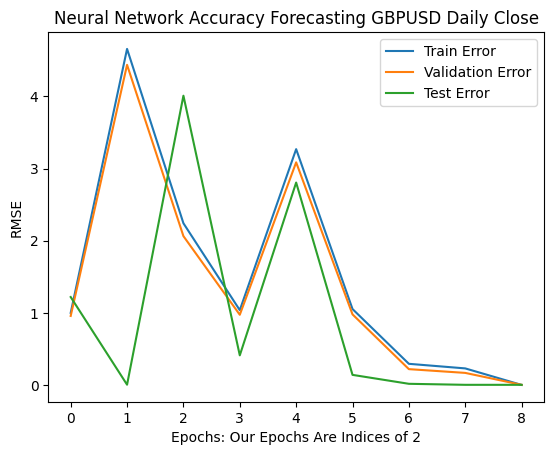

In [ ]:
plt.plot(err_rates.iloc[0,0:9])
plt.plot(err_rates.iloc[1,0:9])
plt.plot(err_rates.iloc[2,0:9])
plt.legend(["Train Error","Validation Error","Test Error"])
plt.ylabel("RMSE")
plt.xlabel("Epochs: Our Epochs Are Indices of 2")
plt.title("Neural Network Accuracy Forecasting GBPUSD Daily Close")

In [ ]:
print(f"Max Iterations: {2 ** 10}")

Max Iterations: 1024


Text(0.5, 1.0, 'Neural Network Accuracy Forecasting GBPUSD Daily Close')

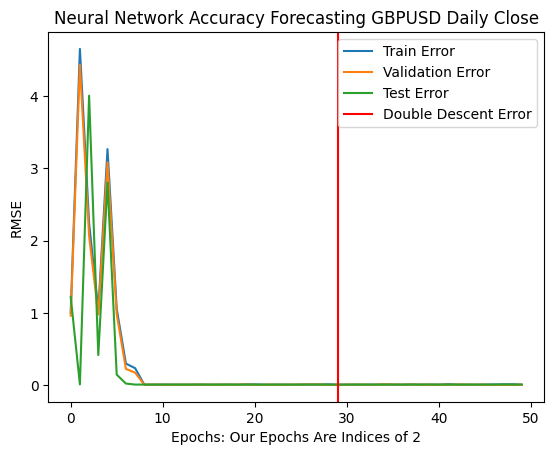

In [ ]:
plt.plot(err_rates.iloc[0,:])
plt.plot(err_rates.iloc[1,:])
plt.plot(err_rates.iloc[2,:])
plt.axvline(err_rates.loc["Test",:].argmin(),color='red')
plt.legend(["Train Error","Validation Error","Test Error","Double Descent Error"])
plt.ylabel("RMSE")
plt.xlabel("Epochs: Our Epochs Are Indices of 2")
plt.title("Neural Network Accuracy Forecasting GBPUSD Daily Close")

In [ ]:
print(f"Max Iterations: {2 ** 29}")

Max Iterations: 536870912


In [ ]:
err_rates

0         1         2         3         4         5   \
Train       1.002545  4.654924  2.242354  1.039942  3.267938  1.055351   
Validation  0.959941  4.434532  2.064445  0.976048  3.085318   0.98163   
Test         1.22152  0.008454  4.007588  0.414665  2.805746  0.144407   

                  6         7         8         9   ...        40        41  \
Train       0.297371  0.233886  0.005294  0.005185  ...  0.005131  0.012252   
Validation  0.223627   0.17166  0.006424  0.005549  ...  0.005374  0.004384   
Test        0.020718  0.006665  0.006534  0.006464  ...  0.006289   0.00665   

                  42        43        44        45        46        47  \
Train       0.006999  0.005054  0.005449  0.005906  0.008643  0.010546   
Validation  0.006427  0.007039   0.00439  0.004849  0.002254  0.001802   
Test         0.00644  0.006686  0.006056  0.006979   0.00612  0.007394   

                  48        49  
Train       0.011746  0.005521  
Validation  0.002448  0.003937  
Test        0.006428  0.006595  

[3 rows x 50 columns]

In [ ]:
err_rates.loc["Test",:].sort_values(ascending=True)

29    0.005544
24    0.005704
21     0.00592
44    0.006056
18    0.006101
46     0.00612
16    0.006123
15    0.006133
34    0.006184
40    0.006289
36    0.006307
31    0.006375
28    0.006408
19    0.006425
48    0.006428
20    0.006437
42     0.00644
26    0.006446
12    0.006453
9     0.006464
8     0.006534
38    0.006565
22    0.006578
49    0.006595
13    0.006595
23    0.006621
33    0.006624
41     0.00665
11    0.006652
35    0.006664
7     0.006665
25    0.006668
27    0.006668
43    0.006686
10    0.006693
17    0.006701
30    0.006734
37    0.006747
32      0.0068
45    0.006979
14     0.00735
47    0.007394
39    0.007479
1     0.008454
6     0.020718
5     0.144407
3     0.414665
0      1.22152
4     2.805746
2     4.007588
Name: Test, dtype: object

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Reinitialize the model
model = MLPRegressor(max_iter=(err_rates.loc["Test",:].argmin()))

In [ ]:
#Define the tuner
tuner = RandomizedSearchCV(
        model,
        {
        "activation" : ["relu","logistic","tanh","identity"],
        "solver":["adam","sgd","lbfgs"],
        "alpha":[0.1,0.01,0.001,0.0001,0.00001,0.00001,0.0000001],
        "tol":[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001],
        "learning_rate":['constant','adaptive','invscaling'],
        "learning_rate_init":[0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001],
        "hidden_layer_sizes":[(1,4),(5,8,10),(5,10,20),(10,50,10),(20,5),(1,5),(20,10)],
        "early_stopping":[True,False],
        "warm_start":[True,False],
        "shuffle": [True,False]
        },
        n_iter=2**9,
        cv=5,
        n_jobs=-1,
        scoring="neg_mean_squared_error"
)

In [ ]:
tuner.fit(train.loc[:,["Open","High","Low","Close"]],train.loc[:,"Target"])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 2560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 751, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/lo

RandomizedSearchCV(cv=5, estimator=MLPRegressor(max_iter=29), n_iter=512,
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'logistic',
                                                       'tanh', 'identity'],
                                        'alpha': [0.1, 0.01, 0.001, 0.0001,
                                                  1e-05, 1e-05, 1e-07],
                                        'early_stopping': [True, False],
                                        'hidden_layer_sizes': [(1, 4),
                                                               (5, 8, 10),
                                                               (5, 10, 20),
                                                               (10, 50, 10),
                                                               (20, 5), (1, 5),
                                                               (20, 10)],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'learning_rate_init': [0.1, 0.01, 0.001,
                                                               0.0001, 1e-05,
                                                               1e-06, 1e-07],
                                        'shuffle': [True, False],
                                        'solver': ['adam', 'sgd', 'lbfgs'],
                                        'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05,
                                                1e-06, 1e-07],
                                        'warm_start': [True, False]},
                   scoring='neg_mean_squared_error')

In [ ]:
tuner.best_params_

{'warm_start': True,
 'tol': 0.1,
 'solver': 'lbfgs',
 'shuffle': False,
 'learning_rate_init': 1e-06,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (5, 8, 10),
 'early_stopping': False,
 'alpha': 1e-05,
 'activation': 'relu'}

In [ ]:
!pip install onnx skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 3.20.2 which is incompatible.


In [ ]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
model = tuner.best_estimator_.fit(train.loc[:,["Open","High","Low","Close"]],train.loc[:,"Target"])

In [ ]:
#Define the input shape of 1,4
initial_type = [('float_input', FloatTensorType([1, 4]))]

In [ ]:
#Specify the input shape
onnx_model = convert_sklearn(model, initial_types=initial_type)

In [ ]:
#Save the onnx model
onnx.save(onnx_model,"GBPUSD DAILY.onnx")